In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [103]:
data=pd.read_excel("/content/drive/MyDrive/parcial1/Datos_Variabilidad.xlsx")
data_copy = data.copy()

In [104]:
data.head()

,Reaccion,Aerobia,Anaerobia,Unnamed: 3
0,3OAR140',5.950000e-08,1.478420e-17,0.0
1,3OAS140',5.950000e-08,0.000000e+00,0.0
2,5DOAN',5.130000e-10,0.000000e+00,0.0
3,A5PISO',2.980000e-08,7.392120e-18,0.0
4,AACPS3',9.760000e-08,0.000000e+00,0.0


In [105]:
X=data[['Aerobia','Anaerobia']]

In [106]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [107]:
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

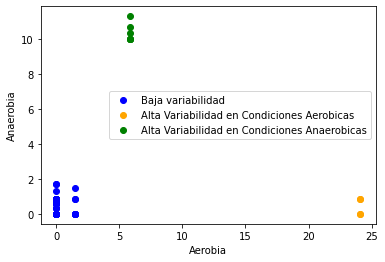

In [108]:
color=['blue','orange','green']
#plt.grid('on')
for k in range(0,3):
    data = X[cluster_labels==k]
    plt.scatter(data["Aerobia"],data["Anaerobia"],c=color[k])
plt.xlabel('Aerobia')
plt.ylabel('Anaerobia')
plt.legend(['Baja variabilidad','Alta Variabilidad en Condiciones Aerobicas','Alta Variabilidad en Condiciones Anaerobicas'])
plt.savefig("/content/drive/MyDrive/parcial1/Analisis_Variabilidad.png",  bbox_inches='tight',dpi=500)

In [109]:
print(data_copy['Reaccion'].iloc[list(X[cluster_labels==1].index)])

204        FRD2'
337    NADH16pp'
338    NADH17pp'
456       SUCDi'
Name: Reaccion, dtype: object


In [110]:
baja_variabilidad = pd.DataFrame()
baja_variabilidad['Reaccion'] = data_copy['Reaccion'].iloc[list(X[cluster_labels==0].index)]
baja_variabilidad.to_excel("/content/drive/MyDrive/parcial1/baja_variabilidad.xlsx")  

In [111]:
variabilidad_condiciones_aerobicas = pd.DataFrame()
variabilidad_condiciones_aerobicas['Reaccion'] = data_copy['Reaccion'].iloc[list(X[cluster_labels==1].index)]
variabilidad_condiciones_aerobicas.to_excel("/content/drive/MyDrive/parcial1/variabilidad_condiciones_aerobicas.xlsx")  

In [112]:
variabilidad_condiciones_anaerobicas = pd.DataFrame()
variabilidad_condiciones_anaerobicas['Reaccion'] = data_copy['Reaccion'].iloc[list(X[cluster_labels==2].index)]
variabilidad_condiciones_anaerobicas.to_excel("/content/drive/MyDrive/parcial1/variabilidad_condiciones_anaerobicas.xlsx")  

In [113]:
X[cluster_labels==1]

,Aerobia,Anaerobia
204,24.1,0.853333
337,24.1,0.000000
338,24.1,0.853333
456,24.1,0.000000
